# 원, 삼각형, 사각형 구분하기
## 1. CNN 모델

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터셋 생성하기

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [4]:
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [5]:
train_generator.filenames[0]

'circle\\circle001.png'

### 모델 구성하기

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
________________________________________________

### 모델 그래프로 보기
- conda install pydot
- conda install graphviz

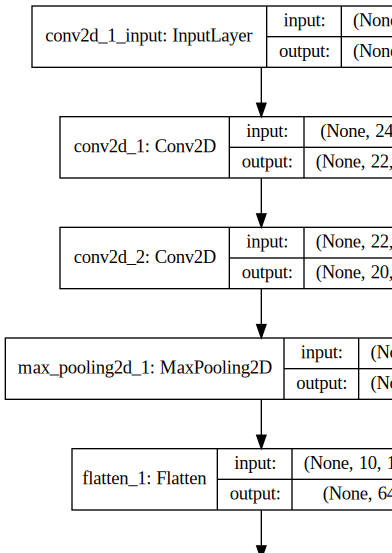

In [7]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

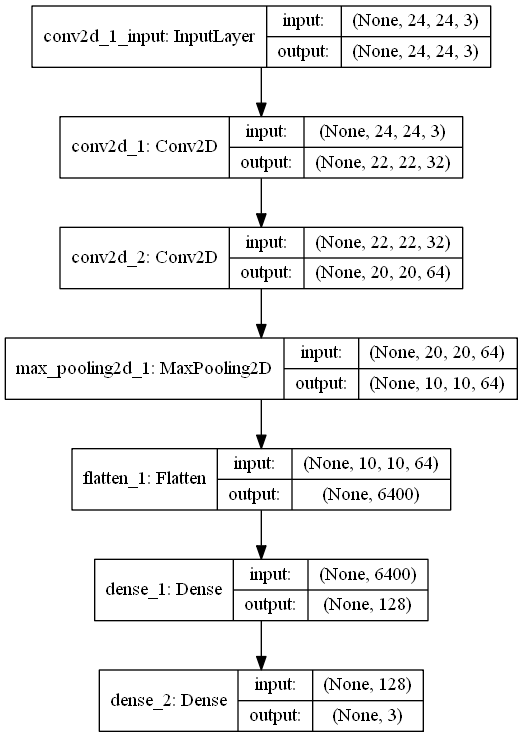

In [8]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)    # to_file='filename.png'

### 모델 학습과정 설정하기

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

### 모델 학습시키기
- 첫번째 인자 : 훈련데이터셋을 제공할 제네레이터를 지정. 본 예제에서는 앞서 생성한 train_generator으로 지정.
- steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정. 총 45개의 훈련 샘플이 있고 배치사이즈가 3이므로 15 스텝으로 지정.
- epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정. 50번을 반복적으로 학습.
- validation_data : 검증데이터셋을 제공할 제네레이터를 지정. 본 예제에서는 앞서 생성한 validation_generator으로 지정.
- validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정. 홍 15개의 검증 샘플이 있고 배치사이즈가 3이므로 5 스텝으로 지정.

In [10]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/50
15/15 [==============================] - 0s 28ms/step - loss: 1.0760 - accuracy: 0.6444 - val_loss: 0.4495 - val_accuracy: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 20ms/step - loss: 0.2105 - accuracy: 0.9556 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 16ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 20ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 5.1257e-05 - val_accuracy: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 0.9333
Epoch 6/50
15/15 [==============================] - 0s 20ms/step - loss: 3.0711e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 19ms/step - loss: 1.3682e-04 - accuracy: 1.0000 - val_loss: 7.6688e-05 - val_accuracy: 1.00

### 모델 평가하기

In [11]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 93.33%


In [12]:
scores[0], scores[1]

(0.00033683449146337807, 0.9333333373069763)

### 모델 사용하기

In [14]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.005 0.995]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.438 0.159 0.403]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.001 0.999]]


In [15]:
test_generator.labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [35]:
for i in range(len(test_generator.labels)):
    print(test_generator.filenames[i], test_generator.labels[i], np.argmax(output[i]))

circle\circle016.png 0 2
circle\circle017.png 0 1
circle\circle018.png 0 0
circle\circle019.png 0 1
circle\circle020.png 0 0
rectangle\rectangle016.png 1 0
rectangle\rectangle017.png 1 1
rectangle\rectangle018.png 1 2
rectangle\rectangle019.png 1 2
rectangle\rectangle020.png 1 0
triangle\triangle016.png 2 2
triangle\triangle017.png 2 1
triangle\triangle018.png 2 0
triangle\triangle019.png 2 2
triangle\triangle020.png 2 1
